# TR Text Classification

## Naive Bayes - Baseline Model

## Import Packages

In [1]:
#!pip install tf-nightly

In [2]:
#!pip install numpy
#!pip install pandas
#!pip install tensorflow
#!pip install matplotlib
#!pip install nlp
#!pip install scikit-learn

In [3]:
#import os

#os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
#os.environ["CUDA_VISIBLE_DEVICE"] = "2"

In [4]:
import numpy as np
import pandas as pd

import tensorflow as tf
import matplotlib.pyplot as plt
import nlp
import random

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [5]:
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.7.0


In [6]:
!python -V

Python 3.7.11


In [7]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12047776199858099850
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 22948610048
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10455790556788152894
physical_device_desc: "device: 0, name: GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
, name: "/device:GPU:1"
device_type: "GPU"
memory_limit: 10105061376
locality {
  bus_id: 1
  links {
  }
}
incarnation: 18313256881160410743
physical_device_desc: "device: 1, name: GeForce RTX 2080 Ti, pci bus id: 0000:21:00.0, compute capability: 7.5"
xla_global_id: 2144165316
]


2021-12-20 13:38:02.298148: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-20 13:38:02.502018: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-20 13:38:02.507286: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-20 13:38:02.508519: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

In [8]:
def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [9]:
def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()

## Import Data

In [10]:
df_model = pd.read_csv("./1-Title_Classification/train1.csv")

## EDA

In [11]:
# Drop the ID columns
df_model = df_model.drop(columns = ['ID'])

In [12]:
# distribution of topics

df_model['TOPIC'].value_counts()

0    3107
1    2406
2    2404
Name: TOPIC, dtype: int64

In [13]:
df_model.head()

,TITLE,TOPIC
0,RITE AID CORP <RAD> SETS DIVIDEND,0
1,DEL E. WEBB INVESTMENT <DWPA> 4TH QTR NET,0
2,GENERAL HOST CORP <GH> SETS QUARTERLY,0
3,PROFESSOR LIFTS BANC TEXAS <BTX> PREFERRED STAKE,1
4,WINCHELL'S DONUT <WDH> SETS INITIAL QUARTERLY,0


In [14]:
##

In [15]:
X_model = df_model['TITLE'].values

In [16]:
y_model = df_model['TOPIC'].values

In [17]:
X_train, X_test, y_train, y_test  = train_test_split(X_model,
                                                     y_model,
                                                     test_size=0.2,
                                                     random_state=42)

## Tokenizer

In [18]:
tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')

tokenizer.fit_on_texts(X_train)

print(tokenizer.texts_to_sequences([X_train[0]]))

[[466, 2379, 5, 3859, 19, 3, 4]]


## Task 5: Padding and Truncating Sequences

1. Checking length of the tweets
2. Creating padded sequences

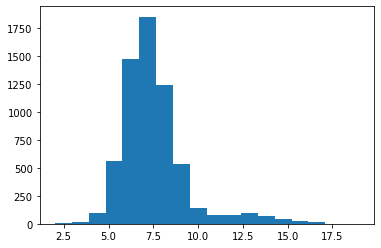

In [19]:
lengths = [len(t.split(' ')) for t in X_train]

plt.hist(lengths, bins=len(set(lengths)))
plt.show()

In [20]:
max(lengths)

19

In [21]:
def get_sequences(tokenizer, tweets):
    sequences = tokenizer.texts_to_sequences(tweets)
    padded_sequences = pad_sequences(sequences, truncating='post', maxlen=35, padding='post')
    return padded_sequences

In [22]:
padded_train_sequences = get_sequences(tokenizer, X_train)

In [23]:
padded_train_sequences[0]

array([ 466, 2379,    5, 3859,   19,    3,    4,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0], dtype=int32)

## Preparing the Labels

1. Creating classes to index and index to classes dictionaries
2. Converting text labels to numeric labels

In [24]:
classes = set(y_train)
print(classes)

{0, 1, 2}


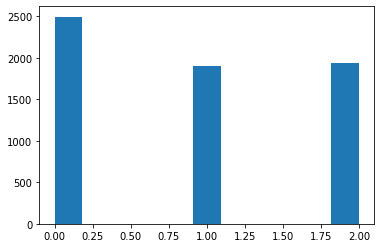

In [25]:
plt.hist(y_train, bins=11)
plt.show()

In [26]:
classes_to_index = dict((c, i) for i, c in enumerate(classes))
index_to_classes = dict((v, k) for k, v in classes_to_index.items())

In [27]:
classes_to_index

{0: 0, 1: 1, 2: 2}

In [28]:
index_to_classes

{0: 0, 1: 1, 2: 2}

In [29]:
names_to_ids = lambda labels: np.array([classes_to_index.get(x) for x in labels])

In [30]:
train_labels = names_to_ids(y_train)
print(train_labels[0])

0


In [31]:
train_labels

array([0, 0, 0, ..., 2, 0, 1])

## Creating the Model

1. Creating the model
2. Compiling the model

In [32]:
!nvidia-smi

Mon Dec 20 13:38:03 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce RTX 3090    Off  | 00000000:01:00.0  On |                  N/A |
| 30%   57C    P2   124W / 350W |    837MiB / 24265MiB |      5%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  GeForce RTX 208...  Off  | 00000000:21:00.0 Off |                  N/A |
| 22%   

In [33]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Bidirectional, LSTM, Dense

In [34]:
# model = Sequential()
# model.add(Bidirectional(LSTM(10, return_sequences=True), input_shape=(5, 10)))
# model.add(Bidirectional(LSTM(10)))
# model.add(Dense(5))
# model.add(Activation('softmax'))
# model.compile(loss='categorical_crossentropy', optimizer='rmsprop')

In [35]:
 # # With custom backward layer
 # model = Sequential()
 # forward_layer = LSTM(10, return_sequences=True)
 # backward_layer = LSTM(10, activation='relu', return_sequences=True,
 #                       go_backwards=True)
 # model.add(Bidirectional(forward_layer, backward_layer=backward_layer,
 #                         input_shape=(5, 10)))
 # model.add(Dense(5))
 # model.add(Activation('softmax'))
 # model.compile(loss='categorical_crossentropy', optimizer='rmsprop')

In [36]:
#!pip install keras

In [37]:
#!pip install tensorflow

In [38]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=35),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

2021-12-20 13:38:03.836443: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-20 13:38:03.837697: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-20 13:38:03.838923: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-20 13:38:03.840368: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-20 13:38:03.841588: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from S

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 35, 16)            160000    
                                                                 
 bidirectional (Bidirectiona  (None, 35, 40)           5920      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 40)               9760      
 nal)                                                            
                                                                 
 dense (Dense)               (None, 3)                 123       
                                                                 
Total params: 175,803
Trainable params: 175,803
Non-trainable params: 0
_________________________________________________________________


## Training the Model

1. Preparing a validation set
2. Training the model

In [39]:
val_sequences = get_sequences(tokenizer, X_test)
val_labels = names_to_ids(y_test)

In [41]:
with tf.device("/gpu:0"):
    h = model.fit(
        padded_train_sequences, train_labels,
        validation_data=(val_sequences, val_labels),
        epochs=20,
        callbacks=[
            tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)
        ]
    )

Epoch 1/20


2021-12-20 13:40:39.786150: E tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded runtime CuDNN library: 8.0.5 but source was compiled with: 8.1.0.  CuDNN library needs to have matching major version and equal or higher minor version. If using a binary install, upgrade your CuDNN library.  If building from sources, make sure the library loaded at runtime is compatible with the version specified during compile configuration.
2021-12-20 13:40:39.786942: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at cudnn_rnn_ops.cc:1555 : UNKNOWN: Fail to find the dnn implementation.
2021-12-20 13:40:39.790376: E tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded runtime CuDNN library: 8.0.5 but source was compiled with: 8.1.0.  CuDNN library needs to have matching major version and equal or higher minor version. If using a binary install, upgrade your CuDNN library.  If building from sources, make sure the library loaded at runtime is compatible with the version specified

CancelledError:  RecvAsync is cancelled.
	 [[{{node div_no_nan_1/ReadVariableOp/_30}}]] [Op:__inference_train_function_10506]

In [47]:
h = model.fit(
    padded_train_sequences, train_labels,
    validation_data=(val_sequences, val_labels),
    epochs=20,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)
    ]
)

Epoch 1/20


2021-12-20 13:18:41.113371: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2021-12-20 13:18:41.116640: W tensorflow/core/framework/op_kernel.cc:1733] INVALID_ARGUMENT: required broadcastable shapes


InvalidArgumentError:  required broadcastable shapes
	 [[node Equal
 (defined at /home/lawrence/miniconda3/envs/nlp3/lib/python3.7/site-packages/keras/metrics.py:3609)
]] [Op:__inference_train_function_11167]

Errors may have originated from an input operation.
Input Source operations connected to node Equal:
In[0] Cast_1 (defined at /home/lawrence/miniconda3/envs/nlp3/lib/python3.7/site-packages/keras/metrics.py:716)	
In[1] Cast_2 (defined at /home/lawrence/miniconda3/envs/nlp3/lib/python3.7/site-packages/keras/metrics.py:3607)

Operation defined at: (most recent call last)
>>>   File "/home/lawrence/miniconda3/envs/nlp3/lib/python3.7/runpy.py", line 193, in _run_module_as_main
>>>     "__main__", mod_spec)
>>> 
>>>   File "/home/lawrence/miniconda3/envs/nlp3/lib/python3.7/runpy.py", line 85, in _run_code
>>>     exec(code, run_globals)
>>> 
>>>   File "/home/lawrence/miniconda3/envs/nlp3/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
>>>     app.launch_new_instance()
>>> 
>>>   File "/home/lawrence/miniconda3/envs/nlp3/lib/python3.7/site-packages/traitlets/config/application.py", line 846, in launch_instance
>>>     app.start()
>>> 
>>>   File "/home/lawrence/miniconda3/envs/nlp3/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 677, in start
>>>     self.io_loop.start()
>>> 
>>>   File "/home/lawrence/miniconda3/envs/nlp3/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 199, in start
>>>     self.asyncio_loop.run_forever()
>>> 
>>>   File "/home/lawrence/miniconda3/envs/nlp3/lib/python3.7/asyncio/base_events.py", line 541, in run_forever
>>>     self._run_once()
>>> 
>>>   File "/home/lawrence/miniconda3/envs/nlp3/lib/python3.7/asyncio/base_events.py", line 1786, in _run_once
>>>     handle._run()
>>> 
>>>   File "/home/lawrence/miniconda3/envs/nlp3/lib/python3.7/asyncio/events.py", line 88, in _run
>>>     self._context.run(self._callback, *self._args)
>>> 
>>>   File "/home/lawrence/miniconda3/envs/nlp3/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 457, in dispatch_queue
>>>     await self.process_one()
>>> 
>>>   File "/home/lawrence/miniconda3/envs/nlp3/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 446, in process_one
>>>     await dispatch(*args)
>>> 
>>>   File "/home/lawrence/miniconda3/envs/nlp3/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 353, in dispatch_shell
>>>     await result
>>> 
>>>   File "/home/lawrence/miniconda3/envs/nlp3/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 648, in execute_request
>>>     reply_content = await reply_content
>>> 
>>>   File "/home/lawrence/miniconda3/envs/nlp3/lib/python3.7/site-packages/ipykernel/ipkernel.py", line 353, in do_execute
>>>     res = shell.run_cell(code, store_history=store_history, silent=silent)
>>> 
>>>   File "/home/lawrence/miniconda3/envs/nlp3/lib/python3.7/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
>>>     return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
>>> 
>>>   File "/home/lawrence/miniconda3/envs/nlp3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2915, in run_cell
>>>     raw_cell, store_history, silent, shell_futures)
>>> 
>>>   File "/home/lawrence/miniconda3/envs/nlp3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2960, in _run_cell
>>>     return runner(coro)
>>> 
>>>   File "/home/lawrence/miniconda3/envs/nlp3/lib/python3.7/site-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner
>>>     coro.send(None)
>>> 
>>>   File "/home/lawrence/miniconda3/envs/nlp3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3186, in run_cell_async
>>>     interactivity=interactivity, compiler=compiler, result=result)
>>> 
>>>   File "/home/lawrence/miniconda3/envs/nlp3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3377, in run_ast_nodes
>>>     if (await self.run_code(code, result,  async_=asy)):
>>> 
>>>   File "/home/lawrence/miniconda3/envs/nlp3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3457, in run_code
>>>     exec(code_obj, self.user_global_ns, self.user_ns)
>>> 
>>>   File "/tmp/ipykernel_4771/832917214.py", line 6, in <module>
>>>     tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)
>>> 
>>>   File "/home/lawrence/miniconda3/envs/nlp3/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "/home/lawrence/miniconda3/envs/nlp3/lib/python3.7/site-packages/keras/engine/training.py", line 1216, in fit
>>>     tmp_logs = self.train_function(iterator)
>>> 
>>>   File "/home/lawrence/miniconda3/envs/nlp3/lib/python3.7/site-packages/keras/engine/training.py", line 878, in train_function
>>>     return step_function(self, iterator)
>>> 
>>>   File "/home/lawrence/miniconda3/envs/nlp3/lib/python3.7/site-packages/keras/engine/training.py", line 867, in step_function
>>>     outputs = model.distribute_strategy.run(run_step, args=(data,))
>>> 
>>>   File "/home/lawrence/miniconda3/envs/nlp3/lib/python3.7/site-packages/keras/engine/training.py", line 860, in run_step
>>>     outputs = model.train_step(data)
>>> 
>>>   File "/home/lawrence/miniconda3/envs/nlp3/lib/python3.7/site-packages/keras/engine/training.py", line 817, in train_step
>>>     self.compiled_metrics.update_state(y, y_pred, sample_weight)
>>> 
>>>   File "/home/lawrence/miniconda3/envs/nlp3/lib/python3.7/site-packages/keras/engine/compile_utils.py", line 460, in update_state
>>>     metric_obj.update_state(y_t, y_p, sample_weight=mask)
>>> 
>>>   File "/home/lawrence/miniconda3/envs/nlp3/lib/python3.7/site-packages/keras/utils/metrics_utils.py", line 73, in decorated
>>>     update_op = update_state_fn(*args, **kwargs)
>>> 
>>>   File "/home/lawrence/miniconda3/envs/nlp3/lib/python3.7/site-packages/keras/metrics.py", line 177, in update_state_fn
>>>     return ag_update_state(*args, **kwargs)
>>> 
>>>   File "/home/lawrence/miniconda3/envs/nlp3/lib/python3.7/site-packages/keras/metrics.py", line 725, in update_state
>>>     matches = ag_fn(y_true, y_pred, **self._fn_kwargs)
>>> 
>>>   File "/home/lawrence/miniconda3/envs/nlp3/lib/python3.7/site-packages/keras/metrics.py", line 3609, in sparse_categorical_accuracy
>>>     return tf.cast(tf.equal(y_true, y_pred), backend.floatx())
>>> 

## ASSESS TRAINED MODEL PERFORMANCE 

In [ ]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)

In [ ]:
accuracy_score(y_test, y_predict_test)

In [ ]:
balanced_accuracy_score(y_test, y_predict_test)

In [ ]:
f1_score(y_test, y_predict_test, average='weighted')